In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
from sklearn.preprocessing import LabelEncoder

import tensorflow as tf
from tensorflow import keras
from keras.layers import Dense, Dropout
from keras.models import Sequential
from sklearn.metrics import accuracy_score

import warnings
warnings.filterwarnings('ignore')

tf.random.set_seed(42)
np.random.seed(42)

from google.colab import drive
drive.mount('/content/drive')


# col_names = ["duration","protocol_type","service","flag","src_bytes",
#     "dst_bytes","land","wrong_fragment","urgent","hot","num_failed_logins",
#     "logged_in","num_compromised","root_shell","su_attempted","num_root",
#     "num_file_creations","num_shells","num_access_files","num_outbound_cmds",
#     "is_host_login","is_guest_login","count","srv_count","serror_rate",
#     "srv_serror_rate","rerror_rate","srv_rerror_rate","same_srv_rate",
#     "diff_srv_rate","srv_diff_host_rate","dst_host_count","dst_host_srv_count",
#     "dst_host_same_srv_rate","dst_host_diff_srv_rate","dst_host_same_src_port_rate",
#     "dst_host_srv_diff_host_rate","dst_host_serror_rate","dst_host_srv_serror_rate",
#     "dst_host_rerror_rate","dst_host_srv_rerror_rate","label"]


file_path = '/content/drive/My Drive/an-ninh-mang/dataset/NSL-KDD/NSL-KDD-Network-Intrusion-Detection/NSL_KDD_Train_shuttle.csv'
df_train = pd.read_csv(file_path)#, names=col_names )

file_path = '/content/drive/My Drive/an-ninh-mang/dataset/NSL-KDD/NSL-KDD-Network-Intrusion-Detection/NSL_KDD_Test_shuttle.csv'
df_test = pd.read_csv(file_path)#, names=col_names)


df_train['Data_Type'] = 1
df_test['Data_Type'] = 0

df = pd.concat([df_train, df_test], ignore_index=True)

df

Mounted at /content/drive


,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,label,Data_Type
0,0,udp,domain_u,SF,44,115,0,0,0,0,...,0.97,0.01,0.00,0.00,0.0,0.0,0.0,0.0,normal,1
1,0,tcp,http,SF,248,1273,0,0,0,0,...,1.00,0.00,0.03,0.03,0.0,0.0,0.0,0.0,normal,1
2,0,tcp,http,SF,310,1957,0,0,0,0,...,1.00,0.00,0.09,0.08,0.0,0.0,0.0,0.0,normal,1
3,0,tcp,http,SF,240,4664,0,0,0,0,...,1.00,0.00,0.06,0.01,0.0,0.0,0.0,0.0,normal,1
4,0,tcp,ftp_data,S0,0,0,0,0,0,0,...,0.25,0.02,0.01,0.00,1.0,1.0,0.0,0.0,neptune,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
148512,0,tcp,echo,RSTO,0,0,0,0,0,0,...,0.02,0.09,0.00,0.00,0.0,0.0,1.0,1.0,neptune,0
148513,0,tcp,telnet,S0,0,0,0,0,0,0,...,0.02,0.07,0.01,0.00,1.0,1.0,0.0,0.0,neptune,0
148514,0,tcp,smtp,SF,0,83,0,0,0,0,...,0.49,0.03,0.00,0.00,0.0,0.0,0.0,0.0,normal,0
148515,50,tcp,telnet,SF,226,2615,0,0,0,1,...,0.01,0.02,0.00,0.00,0.0,0.0,0.0,0.0,xsnoop,0


In [2]:
unique_labels = df['label'].unique()
unique_labels

array(['normal', 'neptune', 'satan', 'apache2', 'warezmaster', 'teardrop',
       'ipsweep', 'mscan', 'back', 'warezclient', 'portsweep', 'nmap',
       'smurf', 'processtable', 'guess_passwd', 'httptunnel', 'mailbomb',
       'saint', 'snmpguess', 'pod', 'snmpgetattack', 'xterm', 'land',
       'loadmodule', 'worm', 'buffer_overflow', 'named', 'imap',
       'multihop', 'sendmail', 'ps', 'spy', 'xlock', 'perl', 'rootkit',
       'sqlattack', 'xsnoop', 'ftp_write', 'phf', 'udpstorm'],
      dtype=object)

In [3]:
# df['label'] = df['label'].replace({ 'normal' : 0, 'neptune' : 1 ,'back': 1, 'land': 1, 'pod': 1, 'smurf': 1, 'teardrop': 1,'mailbomb': 1, 'apache2': 1, 'processtable': 1, 'udpstorm': 1, 'worm': 1,
#                            'ipsweep' : 2,'nmap' : 2,'portsweep' : 2,'satan' : 2,'mscan' : 2,'saint' : 2
#                            ,'ftp_write': 3,'guess_passwd': 3,'imap': 3,'multihop': 3,'phf': 3,'spy': 3,'warezclient': 3,'warezmaster': 3,'sendmail': 3,'named': 3,'snmpgetattack': 3,'snmpguess': 3,'xlock': 3,'xsnoop': 3,'httptunnel': 3,
#                            'buffer_overflow': 4,'loadmodule': 4,'perl': 4,'rootkit': 4,'ps': 4,'sqlattack': 4,'xterm': 4})

In [4]:
df['label'] = df['label'].replace({ 'normal' : 0, 'neptune' : 1 ,'back': 1, 'land': 1, 'pod': 1, 'smurf': 1, 'teardrop': 1,'mailbomb': 1, 'apache2': 1, 'processtable': 1, 'udpstorm': 1, 'worm': 1,
                           'ipsweep' : 1,'nmap' : 1,'portsweep' : 1,'satan' : 1,'mscan' : 1,'saint' : 1
                           ,'ftp_write': 1,'guess_passwd': 1,'imap': 1,'multihop': 1,'phf': 1,'spy': 1,'warezclient': 1,'warezmaster': 1,'sendmail': 1,'named': 1,'snmpgetattack': 1,'snmpguess': 1,'xlock': 1,'xsnoop': 1,'httptunnel': 1,
                           'buffer_overflow': 1,'loadmodule': 1,'perl': 1,'rootkit': 1,'ps': 1,'sqlattack': 1,'xterm': 1})

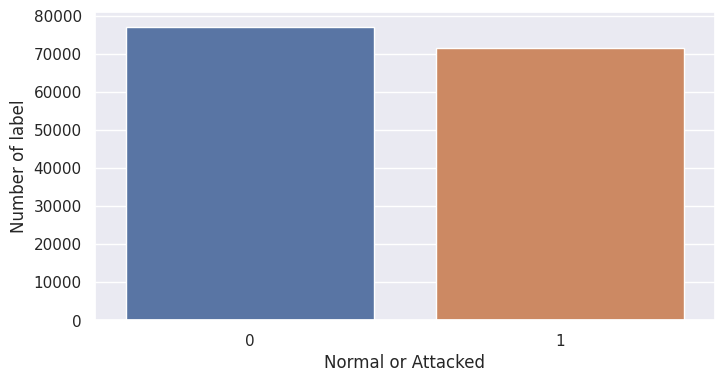

In [5]:
sns.set(rc={'figure.figsize':(8, 4)})
plt.xlabel('Status')
sns.set_theme()
ax = sns.countplot(x='label', data=df)
ax.set(xlabel='Normal or Attacked', ylabel='Number of label')
plt.show()

In [6]:
df = df.drop_duplicates()
df.shape

(148076, 43)

# **Encoding the categorical data - OneHot Encoding**



In [7]:
data_cat = df.select_dtypes(exclude=[np.number])
data_cat.describe(include='all')

,protocol_type,service,flag
count,148076,148076,148076
unique,3,70,11
top,tcp,http,SF
freq,121410,48175,89522


In [8]:
columns_to_encode = data_cat.columns
last_two_columns = df.iloc[:, -2:]
df = df.iloc[:, :-2]

one_hot_encoded = pd.get_dummies(df, columns=columns_to_encode)
df = pd.concat([one_hot_encoded, last_two_columns], axis=1)

df

,duration,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,num_compromised,...,flag_RSTOS0,flag_RSTR,flag_S0,flag_S1,flag_S2,flag_S3,flag_SF,flag_SH,label,Data_Type
0,0,44,115,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,1
1,0,248,1273,0,0,0,0,0,1,0,...,0,0,0,0,0,0,1,0,0,1
2,0,310,1957,0,0,0,0,0,1,0,...,0,0,0,0,0,0,1,0,0,1
3,0,240,4664,0,0,0,0,0,1,0,...,0,0,0,0,0,0,1,0,0,1
4,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
148512,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
148513,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,1,0
148514,0,0,83,0,0,0,0,0,1,0,...,0,0,0,0,0,0,1,0,0,0
148515,50,226,2615,0,0,0,1,0,1,0,...,0,0,0,0,0,0,1,0,1,0


# **Fillna**

In [9]:
df.isnull().sum().to_numpy()

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [10]:
df2 = df.copy()
df2.fillna(df2.mean(), inplace=True)
print(df2.isna().sum().to_numpy())

df2

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0]


,duration,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,num_compromised,...,flag_RSTOS0,flag_RSTR,flag_S0,flag_S1,flag_S2,flag_S3,flag_SF,flag_SH,label,Data_Type
0,0,44,115,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,1
1,0,248,1273,0,0,0,0,0,1,0,...,0,0,0,0,0,0,1,0,0,1
2,0,310,1957,0,0,0,0,0,1,0,...,0,0,0,0,0,0,1,0,0,1
3,0,240,4664,0,0,0,0,0,1,0,...,0,0,0,0,0,0,1,0,0,1
4,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
148512,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
148513,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,1,0
148514,0,0,83,0,0,0,0,0,1,0,...,0,0,0,0,0,0,1,0,0,0
148515,50,226,2615,0,0,0,1,0,1,0,...,0,0,0,0,0,0,1,0,1,0


# **Feature scaling - Standard Scaler**

In [11]:
from sklearn.preprocessing import StandardScaler

columns_to_scale = df2.columns[:-2]
sta = StandardScaler()
df2[columns_to_scale] = sta.fit_transform(df2[columns_to_scale])

df2

,duration,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,num_compromised,...,flag_RSTOS0,flag_RSTR,flag_S0,flag_S1,flag_S2,flag_S3,flag_SF,flag_SH,label,Data_Type
0,-0.112651,-0.007439,-0.004590,-0.013996,-0.08529,-0.010419,-0.094154,-0.059921,-0.823125,-0.011487,...,-0.026638,-0.145867,-0.575312,-0.051123,-0.030982,-0.044906,0.808748,-0.048255,0,1
1,-0.112651,-0.007401,-0.004278,-0.013996,-0.08529,-0.010419,-0.094154,-0.059921,1.214882,-0.011487,...,-0.026638,-0.145867,-0.575312,-0.051123,-0.030982,-0.044906,0.808748,-0.048255,0,1
2,-0.112651,-0.007389,-0.004093,-0.013996,-0.08529,-0.010419,-0.094154,-0.059921,1.214882,-0.011487,...,-0.026638,-0.145867,-0.575312,-0.051123,-0.030982,-0.044906,0.808748,-0.048255,0,1
3,-0.112651,-0.007402,-0.003363,-0.013996,-0.08529,-0.010419,-0.094154,-0.059921,1.214882,-0.011487,...,-0.026638,-0.145867,-0.575312,-0.051123,-0.030982,-0.044906,0.808748,-0.048255,0,1
4,-0.112651,-0.007447,-0.004621,-0.013996,-0.08529,-0.010419,-0.094154,-0.059921,-0.823125,-0.011487,...,-0.026638,-0.145867,1.738186,-0.051123,-0.030982,-0.044906,-1.236479,-0.048255,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
148512,-0.112651,-0.007447,-0.004621,-0.013996,-0.08529,-0.010419,-0.094154,-0.059921,-0.823125,-0.011487,...,-0.026638,-0.145867,-0.575312,-0.051123,-0.030982,-0.044906,-1.236479,-0.048255,1,0
148513,-0.112651,-0.007447,-0.004621,-0.013996,-0.08529,-0.010419,-0.094154,-0.059921,-0.823125,-0.011487,...,-0.026638,-0.145867,1.738186,-0.051123,-0.030982,-0.044906,-1.236479,-0.048255,1,0
148514,-0.112651,-0.007447,-0.004599,-0.013996,-0.08529,-0.010419,-0.094154,-0.059921,1.214882,-0.011487,...,-0.026638,-0.145867,-0.575312,-0.051123,-0.030982,-0.044906,0.808748,-0.048255,0,0
148515,-0.092361,-0.007405,-0.003916,-0.013996,-0.08529,-0.010419,0.401860,-0.059921,1.214882,-0.011487,...,-0.026638,-0.145867,-0.575312,-0.051123,-0.030982,-0.044906,0.808748,-0.048255,1,0


In [12]:
print(df['label'].value_counts())

0    76996
1    71080
Name: label, dtype: int64


# **Splitting the dataset**

In [13]:
train_data = df2[df2['Data_Type'] == 1]
test_data = df2[df2['Data_Type'] == 0]

train_data = train_data.drop('Data_Type', axis=1)
test_data = test_data.drop('Data_Type', axis=1)

In [14]:
test_data.shape

(22535, 123)

In [15]:
X_train = train_data.drop('label', axis=1)
y_train = train_data['label']

X_test = test_data.drop('label', axis=1)
y_test = test_data['label']


# **Select feature**


In [16]:
import pandas as pd
from sklearn.feature_selection import SelectKBest, mutual_info_classif

X = train_data.drop(columns=['label'])
Y = train_data['label']

mutual_info = SelectKBest(score_func=mutual_info_classif, k=13)
X_new = mutual_info.fit_transform(X, Y)

selected_feature_names = list(X.columns[mutual_info.get_support(indices=True)])

print(selected_feature_names)


['src_bytes', 'dst_bytes', 'logged_in', 'count', 'serror_rate', 'same_srv_rate', 'diff_srv_rate', 'dst_host_srv_count', 'dst_host_same_srv_rate', 'dst_host_diff_srv_rate', 'dst_host_serror_rate', 'dst_host_srv_serror_rate', 'flag_SF']


# Training

In [17]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, accuracy_score, precision_recall_fscore_support

def plot_confusion_matrix(confusion_matrix, class_names):
    plt.figure(figsize=(8, 6))
    sns.set(font_scale=1.2)
    sns.heatmap(confusion_matrix, annot=True, fmt='d', cmap='Blues', cbar=False, square=True, xticklabels=class_names, yticklabels=class_names)
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.title('Confusion Matrix')
    plt.show()

def evaluate_classification_with_plot(truth, predicted, threshold=0.5, class_names=['Bengin', 'Malicious']):
    predicted_binary = (predicted > threshold).astype(int)

    confusion = confusion_matrix(truth, predicted_binary)

    accuracy = accuracy_score(truth, predicted_binary)
    print("Accuracy:", accuracy)

    precision, recall, f1, _ = precision_recall_fscore_support(truth, predicted_binary, average='binary')
    print("Precision:", precision)
    print("Recall:", recall)
    print("F1-Score:", f1)

    plot_confusion_matrix(confusion, class_names)

    return accuracy


In [18]:
train_list = selected_feature_names
X_train_copy = X_train[train_list]
X_test_copy = X_test[train_list]

model = Sequential()
model.add(Dense(1024, activation='relu', input_shape=(len(train_list),)))
model.add(Dropout(0.2))
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(1, activation='sigmoid'))
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

Epoch 1/10
491/491 [==============================] - 23s 43ms/step - loss: 0.2037 - accuracy: 0.9208 - val_loss: 0.1913 - val_accuracy: 0.9307
Epoch 2/10
491/491 [==============================] - 21s 43ms/step - loss: 0.1807 - accuracy: 0.9311 - val_loss: 0.1695 - val_accuracy: 0.9322
Epoch 3/10
491/491 [==============================] - 22s 45ms/step - loss: 0.1683 - accuracy: 0.9342 - val_loss: 0.1637 - val_accuracy: 0.9328
Epoch 4/10
491/491 [==============================] - 21s 43ms/step - loss: 0.1581 - accuracy: 0.9368 - val_loss: 0.1485 - val_accuracy: 0.9365
Epoch 5/10
491/491 [==============================] - 21s 42ms/step - loss: 0.1479 - accuracy: 0.9404 - val_loss: 0.1377 - val_accuracy: 0.9446
Epoch 6/10
491/491 [==============================] - 20s 42ms/step - loss: 0.1387 - accuracy: 0.9445 - val_loss: 0.1478 - val_accuracy: 0.9373
Epoch 7/10
491/491 [==============================] - 22s 45ms/step - loss: 0.1335 - accuracy: 0.9467 - val_loss: 0.1280 - val_accuracy:

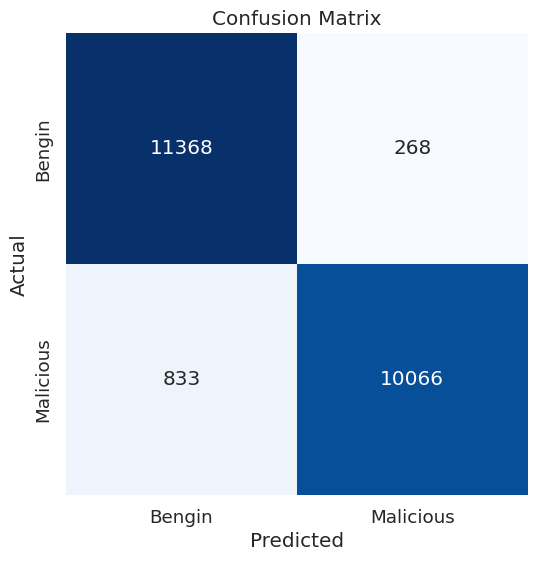

In [19]:
model.fit(X_train_copy, y_train, epochs=10, batch_size=256, validation_data=(X_test_copy, y_test))
y_pred = model.predict(X_test_copy)

accuracy = evaluate_classification_with_plot(y_test, y_pred, class_names=['Bengin', 'Malicious'])